In [1]:
from smote_main import smote_validate_synth
from data_help.data_help import *
from SMOTE.smote import *
from mlp.mlp import *
from data_help.stratcv import *
from scipy.stats import ttest_ind

# Smote Testing
## Synthetic Data
Each classifier is trained on a random subset 80% the size of the original dataset, then validated on the primary
dataset (before oversampling)
### 500% Smote 

In [ ]:
T = np.load("smote_0.npy")
_, T2 = split_by_label(T)
T_smote = np.load("smoke_normal_500p_5nn.npy")
T_smotek = np.load("smote_k_11pergroup_500p_5nn.npy")

Final loss= [[113.426143]]
[0.92, 0.9126315789473685, 0.9163157894736842, 0.913, 0.9163157894736842, 0.9163083829320667]
Plotting decision boundary
Plotting dataset


C:\School\20F\CSDS440\ProgrammingProjects\Local\Imbalanced-Multilayer-Perceptron\mlp\mlp.py:271: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z)


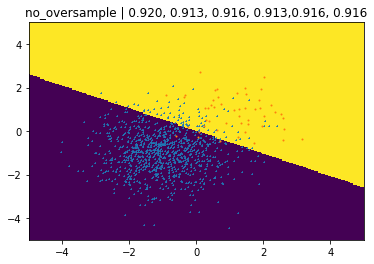

In [3]:
smote_validate_synth(T, T, 0.5, "no_oversample")

Did not converge
Final loss= [[112.30903587]]
[0.94, 0.9178947368421052, 0.9289473684210525, 0.919, 0.9289473684210525, 0.9288816138946765]
Plotting decision boundary
Plotting dataset


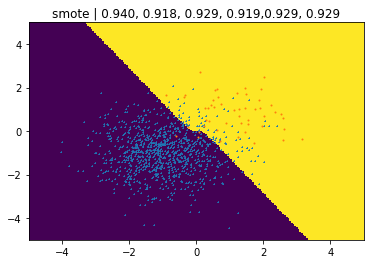

In [6]:
smote_validate_synth(T, T_smote, 0.5, "smote")

Final loss= [[156.]]
[0.94, 0.9136842105263158, 0.9268421052631579, 0.915, 0.9268421052631579, 0.9267487026668755]
Plotting decision boundary
Plotting dataset


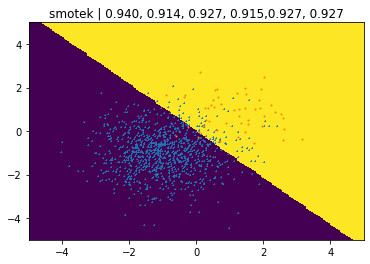

In [7]:
smote_validate_synth(T, T_smotek, 0.5, "smotek")

Final loss= [[187.84398532]]
[0.94, 0.9136842105263158, 0.9136842105263158, 0.915, 0.9268421052631579, 0.9267487026668755]
Plotting decision boundary
Plotting dataset


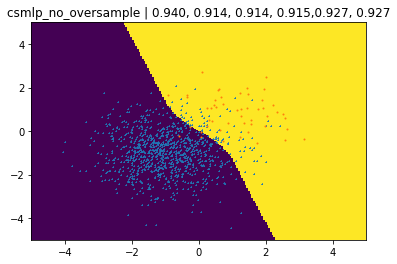

In [10]:
smote_validate_synth(T, T, len(T2)/len(T), "csmlp_no_oversample")

### 1900% Smote (Equal Class Distributions)

In [7]:
T = np.load("smote_0_1900.npy")
_, T2 = split_by_label(T)
T_smote = np.load("smoke_normal_1900p_5nn.npy")
T_smotek = np.load("smote_k_11pergroup_1900p_5nn.npy")

Final loss= [[97.02170211]]
[0.96, 0.9294736842105263, 0.9447368421052631, 0.931, 0.9447368421052631, 0.9446135383542337]
Plotting decision boundary
Plotting dataset


C:\School\20F\CSDS440\ProgrammingProjects\Local\Imbalanced-Multilayer-Perceptron\mlp\mlp.py:271: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z)


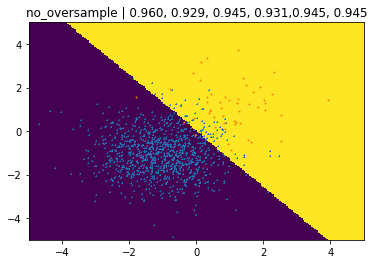

In [11]:
smote_validate_synth(T, T, 0.5, "no_oversample")

Did not converge
Final loss= [[108.37415031]]
[0.96, 0.9326315789473684, 0.9463157894736842, 0.934, 0.9463157894736842, 0.9462168439578074]
Plotting decision boundary
Plotting dataset


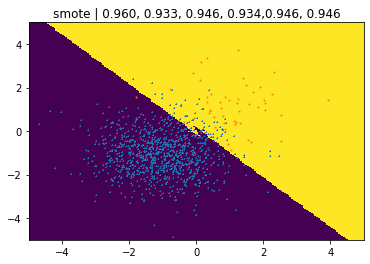

In [13]:
smote_validate_synth(T, T_smote, 0.5, "smote")

Final loss= [[100.7244457]]
[0.98, 0.9273684210526316, 0.9536842105263158, 0.93, 0.9536842105263158, 0.9533210648210702]
Plotting decision boundary
Plotting dataset


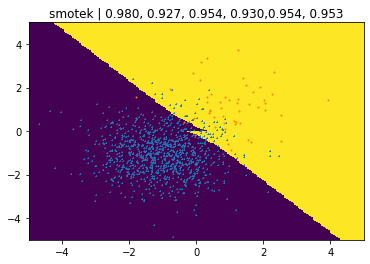

In [18]:
smote_validate_synth(T, T_smotek, 0.5, "smotek")

Final loss= [[18.00001272]]
[0.96, 0.9294736842105263, 0.9584736842105263, 0.931, 0.9447368421052631, 0.9446135383542337]
Plotting decision boundary
Plotting dataset


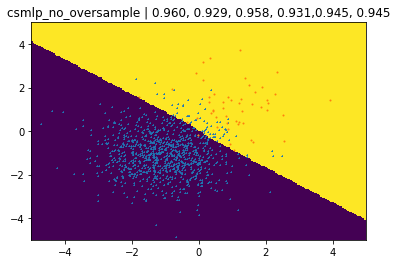

In [19]:
smote_validate_synth(T, T, len(T2)/len(T), "csmlp_no_oversample")

csmlp has significantly shorter training times

## UCI Data
### vehicles

In [2]:
dataset_name = 'vehicle'
T = dataset_load(dataset_name)
T1, T2 = split_by_label(T)
mu = 0.1
beta = 10
h = 18

In [3]:
# Smote
# Sample to give equal class balances
T_smote = T.copy()
T2_smote = SMOTE(T2, int(len(T1)/len(T2)) * 100, k=5)
for ex in T2_smote:
    ex.append(-1)
    ex.insert(0, 1) # add arbitrary index valiue
T2_smote = np.array(T2_smote)
T_smote = np.vstack((T_smote, T2_smote))
smote_mlp = MLP(T1.shape[1], 3, 0.5, np.tanh, mu, beta)

In [4]:
smote_acc  = kfold_cv(smote_mlp, T_smote, k=5, test=T)

Final loss= [[318.]]824.50822469]][[1610.62087871]][[875.76824996]][[1159.20894317]][[284.46736031]][[849.83141903]][[313.96318873]][[316.14545694]][[315.552192]][[318.46446142]][[329.66653341]][[328.00108973]][[306.36540175]][[290.99464167]][[319.37846958]][[318.]]
[1.0, 0.0, 0.5, 0.764775413711584, 0.5, 0.0]
Final loss= [[318.]]8.]]
[1.0, 0.0, 0.5, 0.764775413711584, 0.5, 0.0]
[1537.42347984]][[699.62338533]][[1086.20306126]][[1086.00002046]]Final loss= [[1086.00000038]]
[0.5425038639876353, 0.4723618090452261, 0.5074328365164307, 0.5260047281323877, 0.5074328365164307, 0.5062194253554724]
Final loss= [[275.67099566]]
[1.0, 0.0, 0.5, 0.764775413711584, 0.5, 0.0]
Final loss= [[273.90524659]]3]][[270.47030329]][[268.61069536]][[269.7377443]][[272.44831833]][[273.03149974]][[273.6287298]][[273.63183755]][[273.89825293]][[273.9049234]][[273.90524659]]
[1.0, 0.0, 0.5, 0.764775413711584, 0.5, 0.0]


[[616.5073113]]
[[1192.42779498]]
[[1271.77289041]]
[[1259.3765893]]
[[1018.81078837]]
[[1390.13705366]]
[[896.81364181]]
[[1210.08794733]]
[[1182.06461274]]
[[1187.21424321]]
[[1183.99138099]]
[[866.36325798]]
[[1436.02181323]]
[[999.29061427]]
[[1320.19471122]]
[[1066.95238706]]
[[1051.72723758]]
[[1696.92459428]]
[[751.19236696]]
[[1327.41449051]]
[[982.90776985]]
[[1159.61122418]]
[[1014.37119782]]
[[1335.70922889]]
[[1036.55687564]]
[[1402.69655029]]
[[992.72192029]]
[[1373.49199996]]
[[1059.36668332]]
[[1074.60496242]]
[[1188.77323634]]
[[975.59260073]]
[[1270.91510158]]
[[1039.82460121]]
[[1252.78600758]]
[[1212.14273742]]
[[1123.16928258]]
[[1195.06920232]]
[[1165.1425118]]
[[1228.7474478]]
[[1019.64764944]]
[[1063.48318989]]
[[800.42296197]]
[[928.60151504]]
[[950.15430308]]
[[902.54675414]]
[[1251.63945619]]
[[569.91904033]]
[[668.65407565]]
[[605.099183]]
[[547.15788476]]
[[547.89928808]]
[[562.70270289]]
[[562.26390721]]
[[572.61363173]]
[[559.68062109]]
[[564.14776237]]
[[

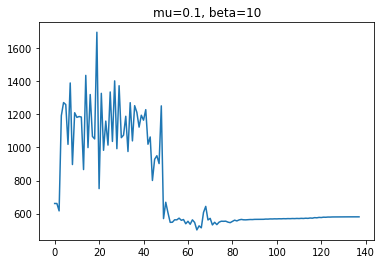

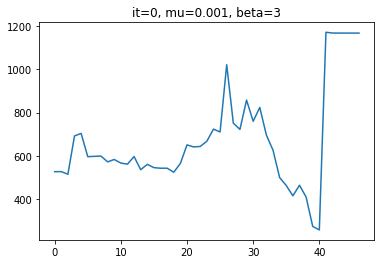

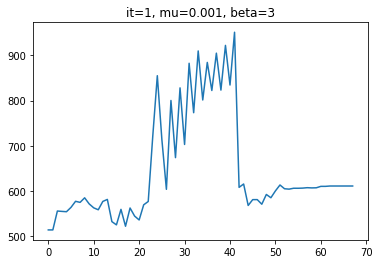

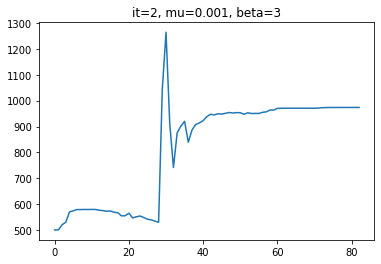

In [14]:
smote_mlp1 = MLP(T1.shape[1], h, 0.5, np.tanh, mu, beta, repeat=True)
single_T2smote = [ex[1:-1] for ex in T2_smote]
smote_mlp1.train(T1, single_T2smote)
single_run_smote1 = eval_mlp(smote_mlp1, T, T1, T2)
print(single_run_smote1)

In [5]:
# Smote kmeans
T_smotek = T.copy()
T2_smotek = kmeans_SMOTE(T, T2, int(len(T1)/len(T2)) * 100, k=5, n_clusters=int(len(T2) / 30))
for ex in T2_smotek:
    ex.append(-1)
    ex.insert(0, 1) # add arbitrary index valiue
T2_smotek = np.array(T2_smotek)
T_smotek = np.vstack((T_smotek, T2_smotek))

[566.72270844]][[521.46342595]][[484.98440208]]Final loss= [[484.98440208]]
Re-optimizing from loss at 377.030
Final loss= [[548.37088387]]95]][[462.29651842]][[479.60833657]][[527.35745311]][[313.10463089]][[290.29071391]][[270.6863201]][[273.72351535]][[548.37088387]]
Re-optimizing from loss at 356.459
[558.7111168]][[558.57875482]][[577.08586892]][[576.86694179]][[503.74505402]][[527.95285132]][[524.19591978]][[546.22624527]][[533.82897829]][[554.05303822]][[549.64092108]][[559.68693305]][[562.74834313]][[559.3834575]][[562.55600848]][[552.22876893]]Final loss= [[552.22876787]]
Re-optimizing from loss at 308.582
[598.20835667]][[606.89848602]][[610.66368716]][[613.47837472]][[536.32732887]][[553.19533772]][[541.08744221]][[546.44838093]][[527.13166077]][[536.14350868]][[531.71414963]][[526.74908426]][[549.33369128]][[444.3476159]][[448.47405536]][[504.84662095]][[451.6092114]][[624.120629]][[621.68867077]][[466.5835717]][[633.62219902]]Final loss= [[633.62218399]]
[0.984544049459041

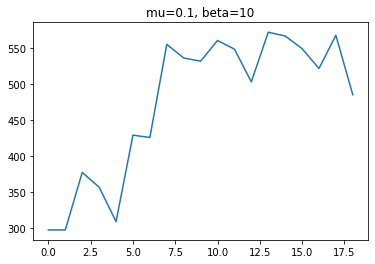

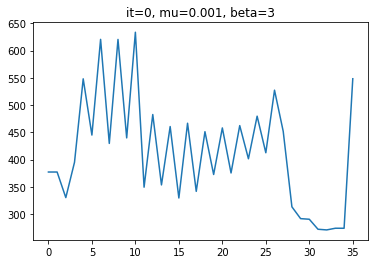

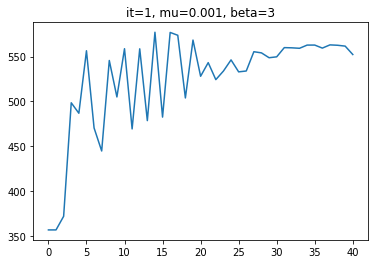

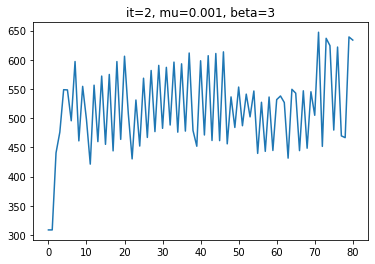

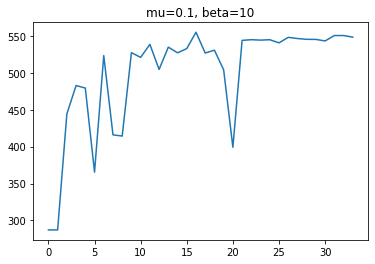

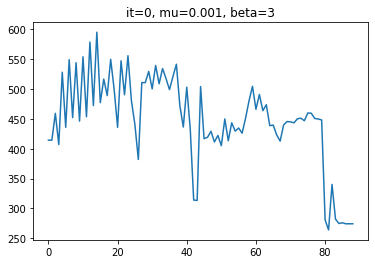

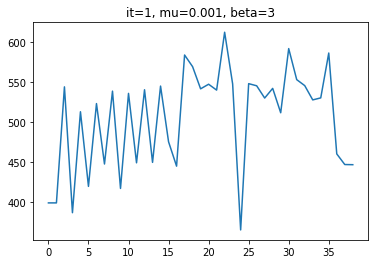

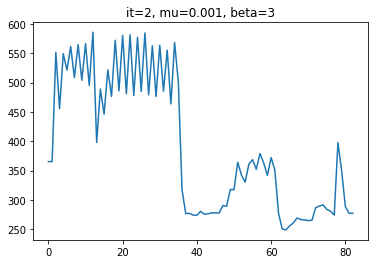

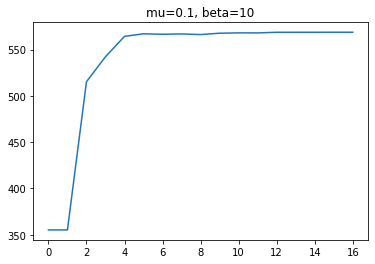

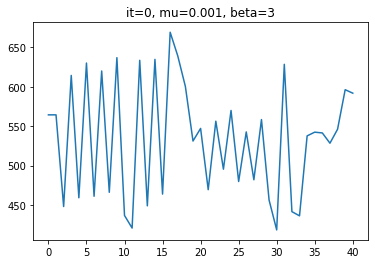

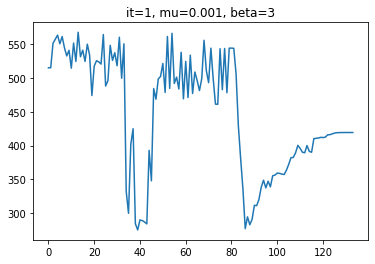

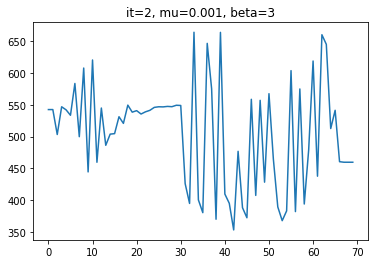

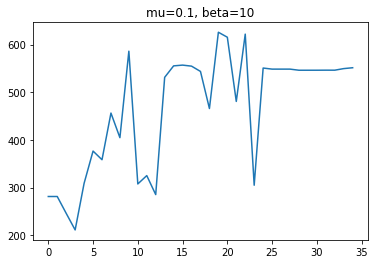

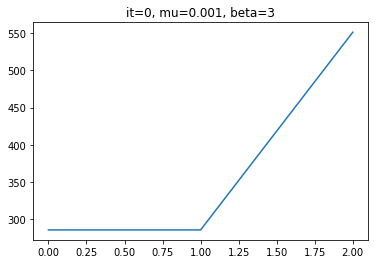

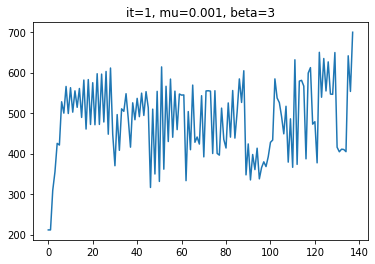

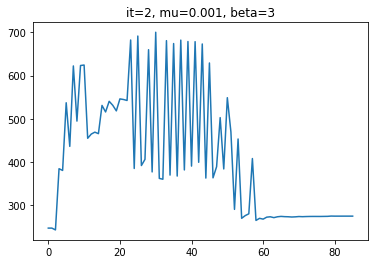

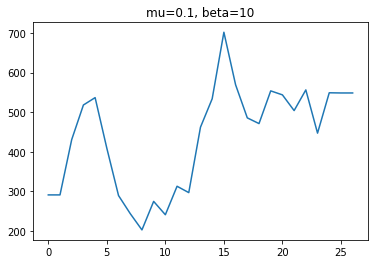

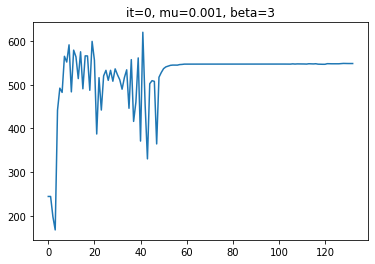

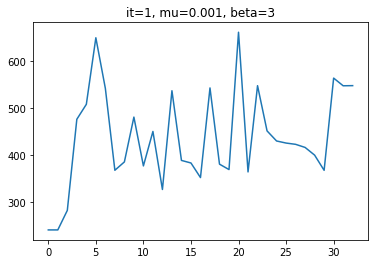

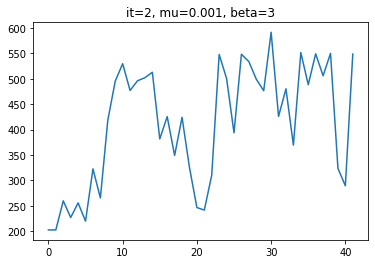

In [8]:
smotek_mlp = MLP(T1.shape[1], 7, 0.4, np.tanh, mu, beta, repeat=True)
smotek_acc = kfold_cv(smotek_mlp, T_smotek, k=5, test=T)

Final loss= [[548.37087712]]
Re-optimizing from loss at 407.277
[564.6192571]][[523.59640963]][[521.09763924]][[515.07027216]][[532.18749833]][[515.92816205]][[536.96423729]][[543.19820392]][[520.09432722]][[516.85979108]][[529.71927503]][[492.6723297]][[539.01432978]][[550.94350932]][[521.83819263]][[517.61992161]][[522.82948209]][[535.41856546]][[528.12915111]][[529.72370087]][[546.77817236]][[549.23008612]][[540.57701667]][[552.35011209]][[533.30907877]][[452.38179013]][[457.36871698]][[476.06889386]][[376.80647335]][[394.54801935]][[405.20735142]][[427.98772474]][[446.25409936]][[438.82295848]][[486.25784634]][[489.37530932]][[478.32896669]][[574.01856304]][[573.16374347]][[575.02410543]][[479.84766814]][[493.45412212]][[495.2691498]][[581.03739371]][[608.58884799]][[438.20158334]][[452.85803092]][[542.20415829]][[466.82900601]][[412.45818987]][[465.61102656]][[442.57043212]][[478.35595648]][[447.0069194]][[443.8805381]][[531.60791494]][[560.19326188]][[561.86672515]][[525.7991179]

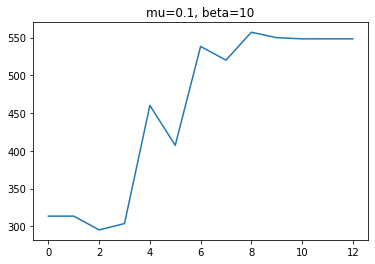

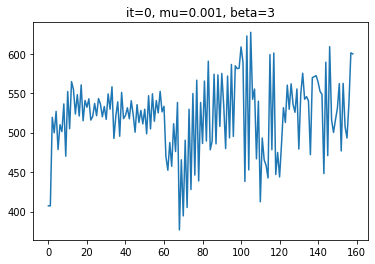

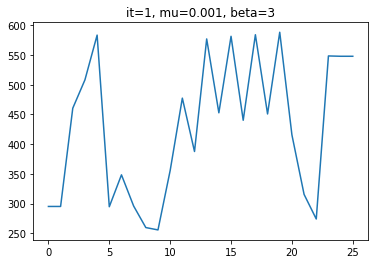

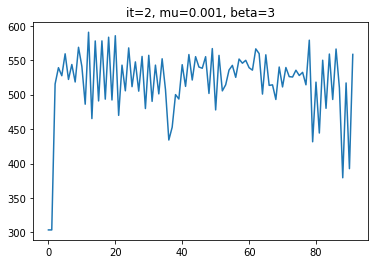

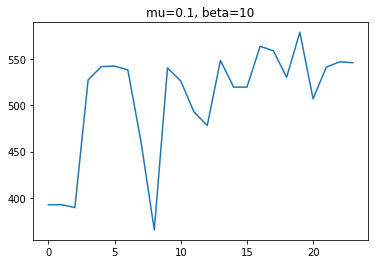

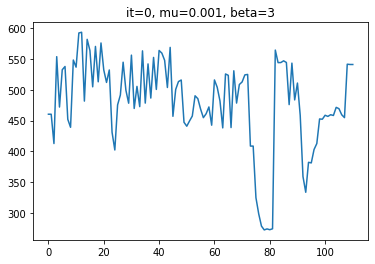

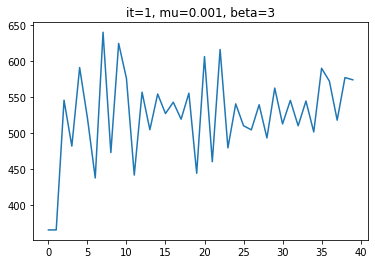

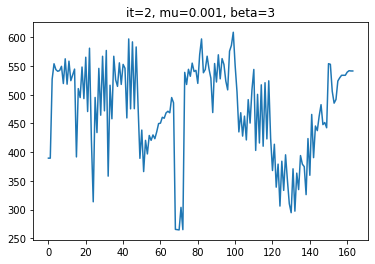

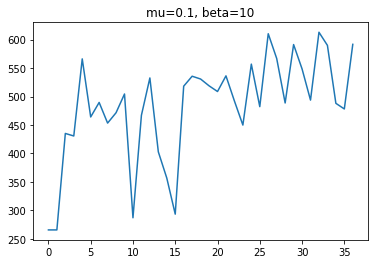

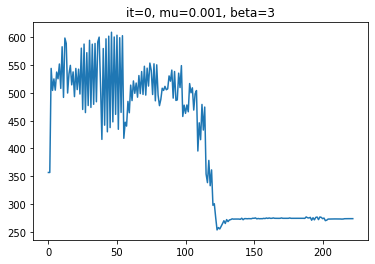

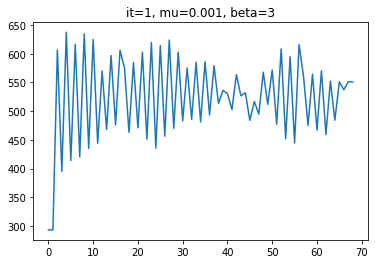

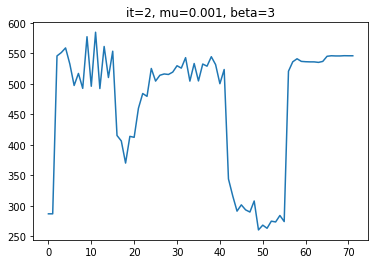

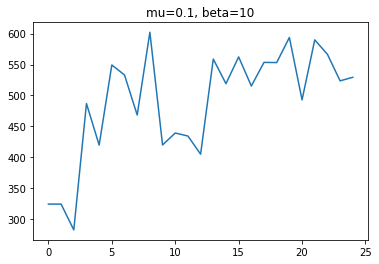

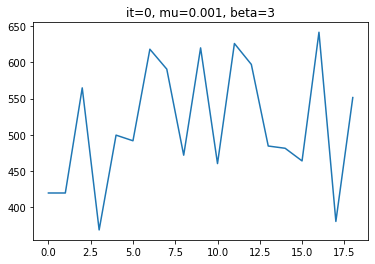

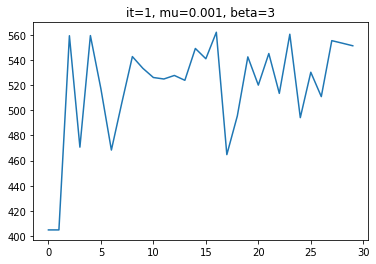

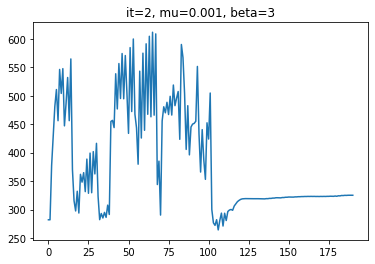

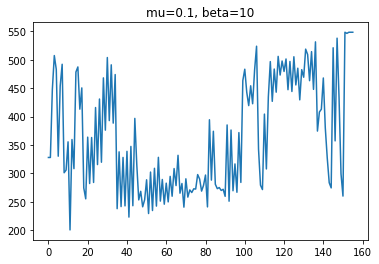

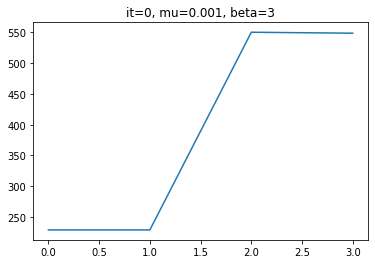

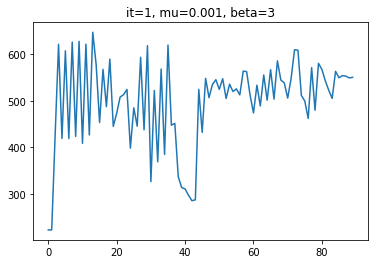

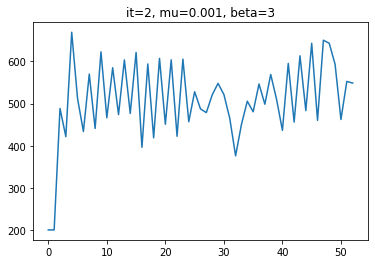

In [9]:
smotek1_mlp = MLP(T1.shape[1], 13, 0.4, np.tanh, mu, beta, repeat=True)
smotek1_acc = kfold_cv(smotek1_mlp, T_smotek, k=5, test=T)

In [4]:
single_smotek_mlp = MLP(T1.shape[1], h, 0.5, np.tanh, mu, beta)
single_T2 = [ex[1:-1] for ex in T2_smotek]
single_smotek_mlp.train(T1, single_T2)
single_run_smotek = eval_mlp(single_smotek_mlp, T, T1, T2)
print(single_run_smotek)

[[695.92276155]]
[[1197.22844597]]
[[1192.27259059]]
[[1278.07034046]]
[[1168.42866004]]
[[1213.57241087]]
[[983.70303332]]
[[1254.32259926]]
[[1126.46767959]]
[[1211.16194893]]
[[999.61809675]]
[[1173.60645624]]
[[1148.79952432]]
[[1149.21217199]]
[[1045.08647754]]
[[1130.87075397]]
[[1021.57589881]]
[[1182.33152587]]
[[1065.88454707]]
[[1264.26055626]]
[[1047.48499272]]
[[1234.11155953]]
[[540.2455004]]
[[555.69199912]]
[[738.41156421]]
[[616.35878896]]
[[626.97480541]]
[[684.55411733]]
[[406.26262998]]
[[677.33875238]]
[[561.65783147]]
[[722.44670226]]
[[587.5818187]]
[[609.7029865]]
[[586.99958587]]
[[600.70876126]]
[[586.43340385]]
[[624.26233482]]
[[592.79178442]]
[[618.95239162]]
[[604.2271249]]
[[658.87450209]]
[[692.06300478]]
[[694.53858319]]
[[692.6540536]]
[[699.8382648]]
[[698.09399746]]
[[703.14751583]]
[[700.83650126]]
[[697.41678562]]
[[605.76878947]]
[[657.06621518]]
[[607.43135161]]
[[599.58168285]]
[[670.25239999]]
[[589.72597154]]
[[774.92212016]]
[[587.09415698]]
[

[[817.84890337]]
[[1450.89605156]]
[[933.07700143]]
[[1401.70863268]]
[[918.31438402]]
[[798.81075464]]
[[1399.81047361]]
[[1012.76900258]]
[[1356.33138624]]
[[1038.73817715]]
[[900.2978112]]
[[1170.87425544]]
[[1111.57974674]]
[[1196.02926122]]
[[1083.22876856]]
[[1174.15587385]]
[[1298.95329514]]
[[1302.91083689]]
[[1276.54845169]]
[[1308.19205328]]
[[1291.05553873]]
[[1261.62995759]]
[[1119.35879251]]
[[502.89959947]]
[[1501.46895426]]
[[729.52458014]]
[[657.48426205]]
[[1346.59650684]]
[[1344.05271607]]
[[1344.00660234]]
[[1344.00087112]]
[[1344.00011684]]
[[1344.00001576]]
[[1344.00000213]]
Final loss= [[1344.00000213]]
Re-optimizing from loss at 729.525
[[620.68820266]]
[[1039.86704525]]
[[1213.34610951]]
[[1035.80770519]]
[[1206.38483185]]
[[1014.12298229]]
[[1244.52952878]]
[[1159.73890714]]
[[1259.35343574]]
[[1132.02061726]]
[[1274.58154325]]
[[1280.71077488]]
[[1199.81106901]]
[[959.1927806]]
[[1267.08109737]]
[[1149.43553025]]
[[564.82364226]]
[[1132.62780986]]
[[515.317832

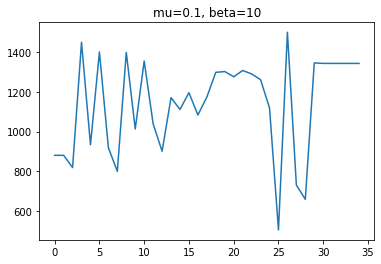

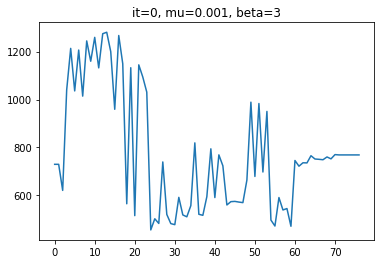

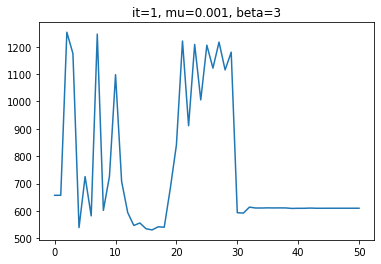

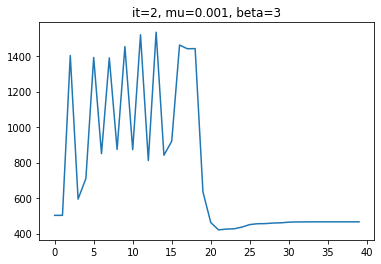

In [11]:
single_smotek_mlp1 = MLP(T1.shape[1], 7, 0.5, np.tanh, mu, beta, repeat=True)
single_smotek_mlp1.train(T1, single_T2)
single_run_smotek = eval_mlp(single_smotek_mlp1, T, T1, T2)
print(single_run_smotek)
